## Study of coverage
The goal of this file is to find why some references are missing from some sources.

In [48]:
import pandas as pd
import numpy as np
from itertools import product
import random
import matplotlib.pyplot as plt
import random
import seaborn as sns

#Create color for bar chart belows
def create_colors(nb_color):
    random.seed(190700)
    color = ["#"+''.join([random.choice('0123456789ABCDEF') for j in range(6)])
             for i in range(nb_color)]
    return color

# Function to create the column with the information of combination of source that return a paper
def compute_combination(row):
    combination = np.array([row[i] for i in range(df.shape[1]-3)])
    return possibleCombination_code[str(combination)]

# Function to transform every possible source from IEEE that have different names (e.g IEEE Transactions on Medical Imaging) into IEEE
def process_venue(row):
    if "IEEE" in row["venue"]:
        return "IEEE"
    else:
        return row["venue"]

#Load csv and drop entry with venue not known
df = pd.read_csv("../processed_csv/coverage.csv",index_col=0)
df = df.dropna(subset=["venue"])

#Compute every possible combination of True and False for the number of sources we use
possibleCombination = sorted(np.array([ele for ele in product([True,False], repeat = df.shape[1]-3)]),key=sum)
#Attribute a id to this combination
possibleCombination_code = {str(e):i for i,e in enumerate(possibleCombination)}

df["combination"] =df.apply(compute_combination,axis=1)
df["venue"] = df.apply(process_venue,axis=1)

#Sort value by combination to have easier navigation/research in the html
df = df.sort_values('combination',ascending=False)

#Use to color the html cells to green if the paper is returned by a source and red otherwise
def color_background(row):
    return [
        'background-color: green; color: green' if cell == True
        else 'background-color: red; color: red'
        for cell in row
    ]
#Applied the function to the sources columns only
df_html = df.iloc[:,:df.shape[1]-1].style.apply(color_background,subset=df.columns[0:-4])
#Export to HTML
df_html.to_html("../res/coverage.html")

### Combinations code 

In [49]:
print(list(df.columns[0:-4]))
possibleCombination_code

['poci', 'openalex', 'coci']


{'[False False False]': 0,
 '[ True False False]': 1,
 '[False  True False]': 2,
 '[False False  True]': 3,
 '[ True  True False]': 4,
 '[ True False  True]': 5,
 '[False  True  True]': 6,
 '[ True  True  True]': 7}

## By venue

Text(0.5, 1.0, 'Count of combinations by venue')

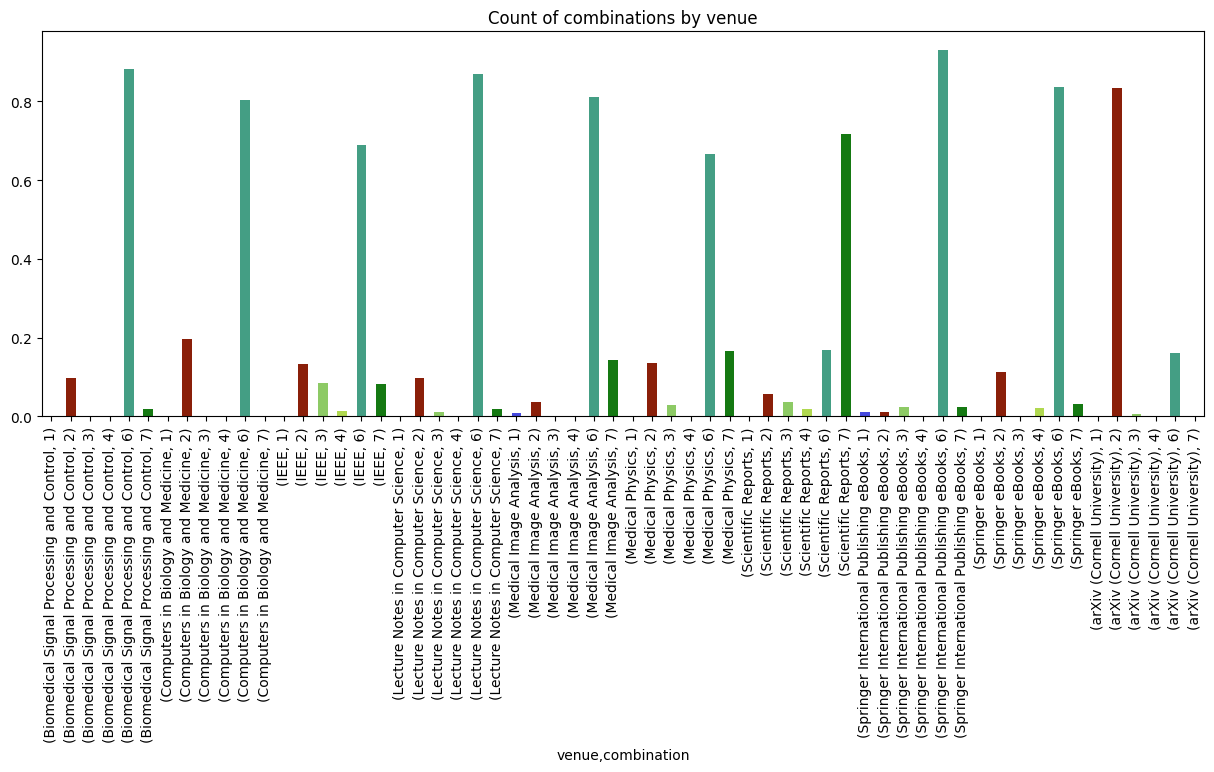

In [50]:
number_of_colors = 6
color = create_colors(number_of_colors)

max_number_venue = 10
df_plot = df[df['venue'].isin(df['venue'].value_counts()[:max_number_venue].index.tolist())]
df_plot = df_plot.astype({"venue": str, "combination": int})
plt.figure(figsize=(15,5))

((df_plot.groupby(['venue','combination'])["poci"].count()/df_plot.groupby(['venue'])["poci"].count()).unstack(fill_value=0).stack()).plot.bar(color=color)
plt.title("Count of combinations by venue")

In [51]:
#Compute statistique when the combination is 3 (i.e when OpenCitation with Crossref return the paper but not OpenAlex)
comb3_percentage = (df[df["combination"] == 3].groupby('venue').count()["poci"]/df.groupby('venue')["poci"].count()*100)
comb3_count = df[df["combination"] == 3].groupby('venue').count()["poci"]
venue_count = df.groupby('venue').count()["poci"]

comb3_mix = pd.concat([comb3_count,venue_count,comb3_percentage],axis=1)
comb3_mix.columns = ["comb3 count","venue count","%"]
comb3_mix = comb3_mix.dropna(subset="%").sort_values("%",ascending=False)
comb3_mix

,comb3 count,venue count,%
venue,,,
Pure Mathematics,1.0,1,100.000000
Open Access Macedonian Journal of Medical Sciences,1.0,1,100.000000
"Medical Imaging 2022: Biomedical Applications in Molecular, Structural, and Functional Imaging",2.0,2,100.000000
International Conference on Telecommunications,1.0,1,100.000000
International Conference on Machine Learning and Cybernetics,1.0,1,100.000000
International Conference on Consumer Electronics,1.0,1,100.000000
International Conference on Bioinformatics,1.0,1,100.000000
2021 10th International Conference on System Modeling & Advancement in Research Trends (SMART),1.0,1,100.000000
"International Conference Bioscience, Biochemistry and Bioinformatics",1.0,1,100.000000


Check for IEEE which seems problematic

<AxesSubplot: xlabel='combination'>

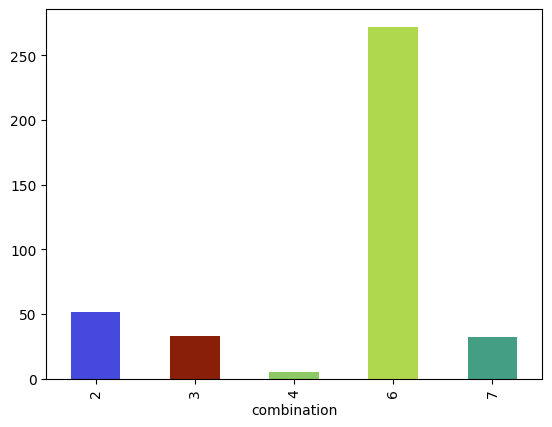

In [52]:
number_of_colors = 5
color = create_colors(number_of_colors)
df_plot[df_plot["venue"]=="IEEE"].groupby(['combination'])["poci"].count().plot.bar(color=color)

## By year

Text(0.5, 1.0, 'Count of combinations by year')

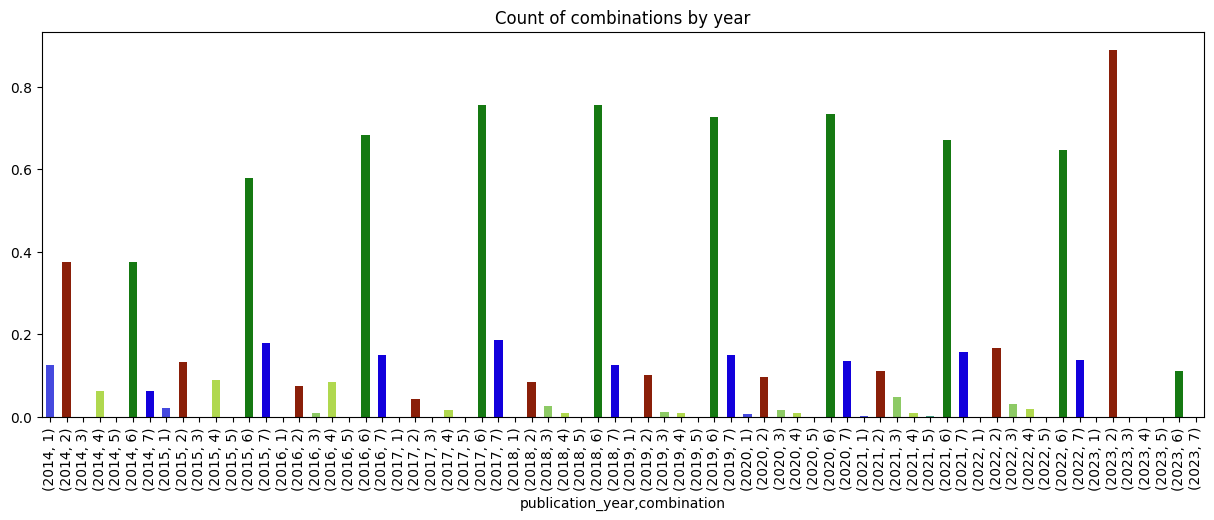

In [53]:
number_of_colors = 7
color = create_colors(number_of_colors)

df_plot = df[df["publication_year"] == df["publication_year"]]
df_plot = df.astype({"publication_year": str, "combination": int})
plt.figure(figsize=(15,5))

((df_plot.groupby(['publication_year','combination'])["poci"].count()/df_plot.groupby(['publication_year'])["poci"].count()).unstack(fill_value=0).stack()).plot.bar(color=color)
plt.title("Count of combinations by year")

## By open access

Text(0.5, 1.0, 'Count of combinations with open access status')

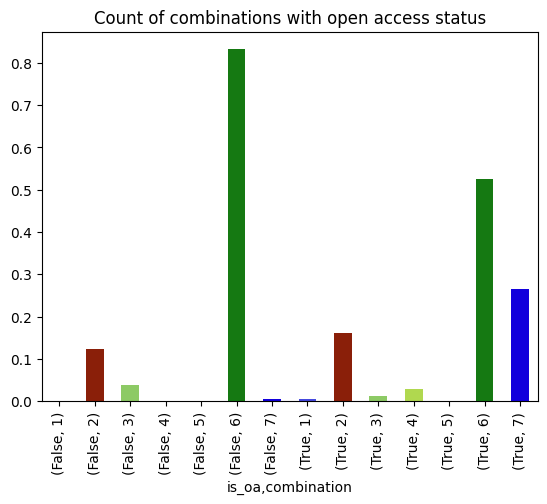

In [54]:
number_of_colors = 7
color = create_colors(number_of_colors)

((df.groupby(['is_oa','combination'])["poci"].count()/df_plot.groupby(['is_oa'])["poci"].count()).unstack(fill_value=0).stack()).plot.bar(color=color)
plt.title("Count of combinations with open access status")

# Comparaison of sources

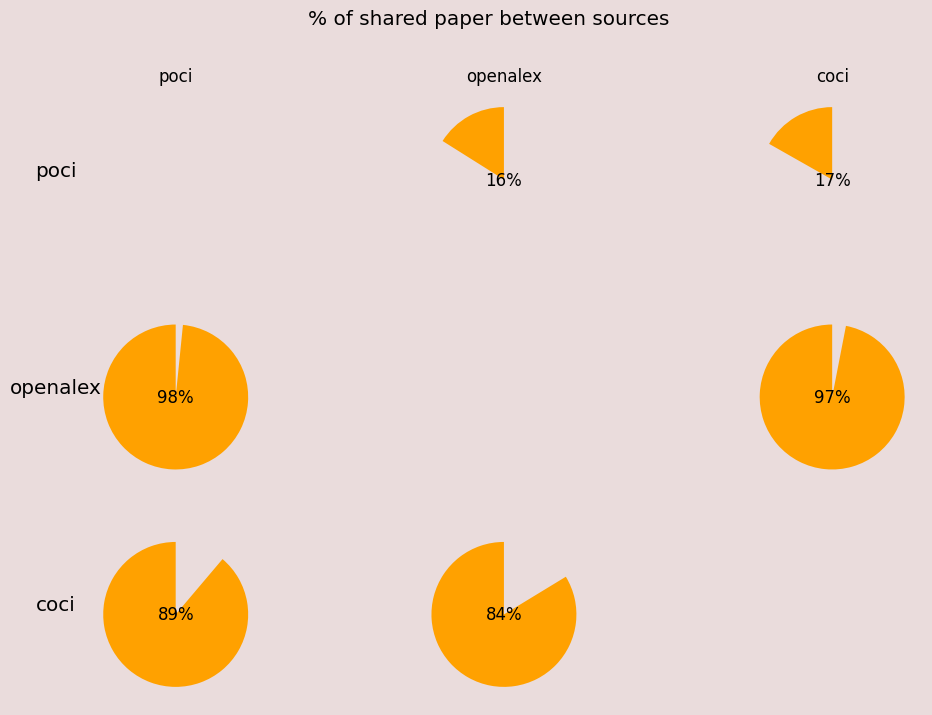

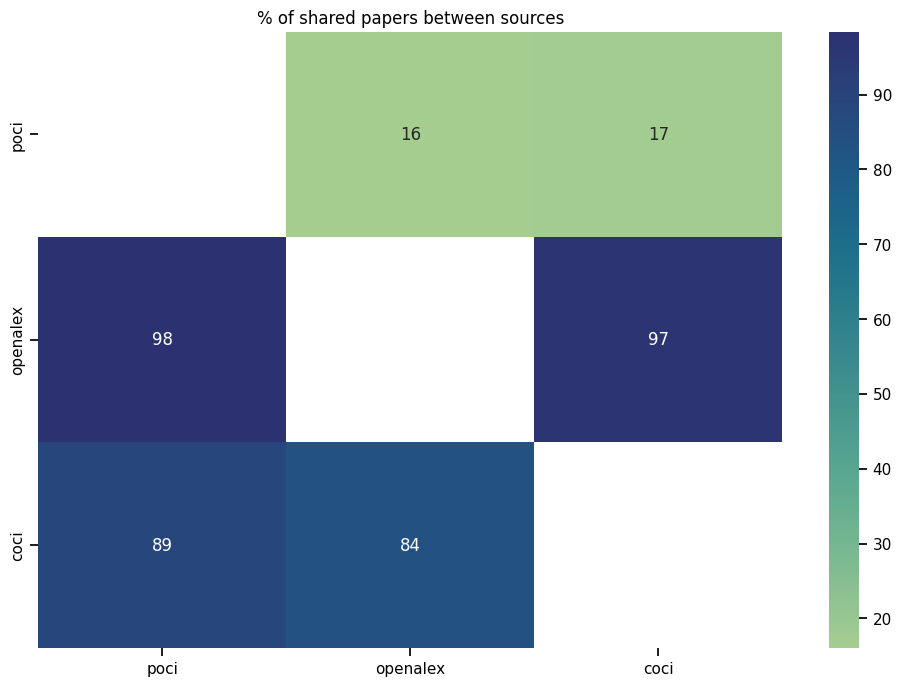

In [153]:
dict_compare = {source1:{source2:None for source2 in df.columns[0:-4]} for source1 in df.columns[0:-4]}
i = 0
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(12, 8),facecolor='#eadcdc')
plt.suptitle(r"% of shared paper between sources")
for source1 in df.columns[0:-4]:
    for source2 in df.columns[0:-4]:
        i+=1
        plt.subplot(3,3,i)
        if source1 == source2:
            plt.pie([0],labels=[''],normalize=False,startangle=90,colors=["orange"])
            continue
        shared_coverage = df[(df[source1] == True) & (df[source2] == True)]
        val = len(shared_coverage)/len(df[df[source2]==True])
        dict_compare[source1][source2] = val*100
        plt.pie([val],labels=[''],normalize=False,startangle=90,autopct=lambda p:f"{round(p)}%",colors=["#ffa100"],pctdistance=0)

for ax, col in zip(axes[0], df.columns[0:-4]):
    ax.set_title(col)

for ax, row in zip(axes[:,0], df.columns[0:-4]):
    ax.set_ylabel(row, rotation=0, size='large',labelpad=15)
    
plt.show()


df_compare = pd.DataFrame.from_dict(dict_compare)
plt.figure(figsize=(12, 8))
plt.title(r"% of shared papers between sources")
sns.heatmap(df_compare.T, annot=True,cmap="crest")
sns.set_context("notebook")